# Mathematical Operations with Computer Vision
###### by: João Ataíde
---

In [1]:
#Importando as bibliotecas
import cv2
import numpy as np

#image configs
import matplotlib.pyplot as plt
import matplotlib

matplotlib.style.use('dark_background')
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
matplotlib.rcParams['image.cmap'] = 'gray'
%matplotlib inline

In [2]:
DATA_PATH = r"D:\Estudos\OpenCV\Computer Vision - Introduction\w1 - Getting Started\data"

## Datatype Conversion


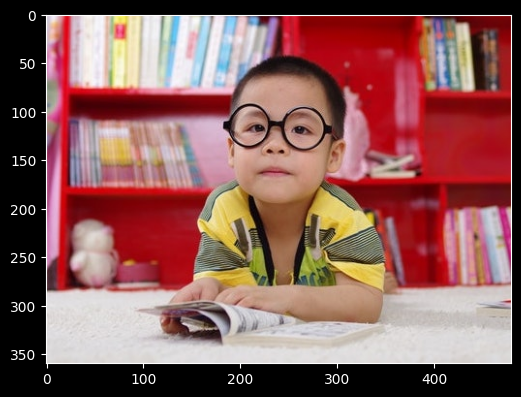

In [3]:
imagePath = f"{DATA_PATH}\\images\\boy.jpg"
image = cv2.imread(imagePath, 1)
plt.imshow(image[:,:,::-1]);

In [4]:
scalingFator = 1/255.0
image = np.float32(image)
image = image * scalingFator
print("Image Type", image.dtype)

Image Type float32


In [5]:
image = image * (1.0/scalingFator)
image = np.uint8(image)
print("Image Type", image.dtype)

Image Type uint8


## Contrast Enhacementent

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


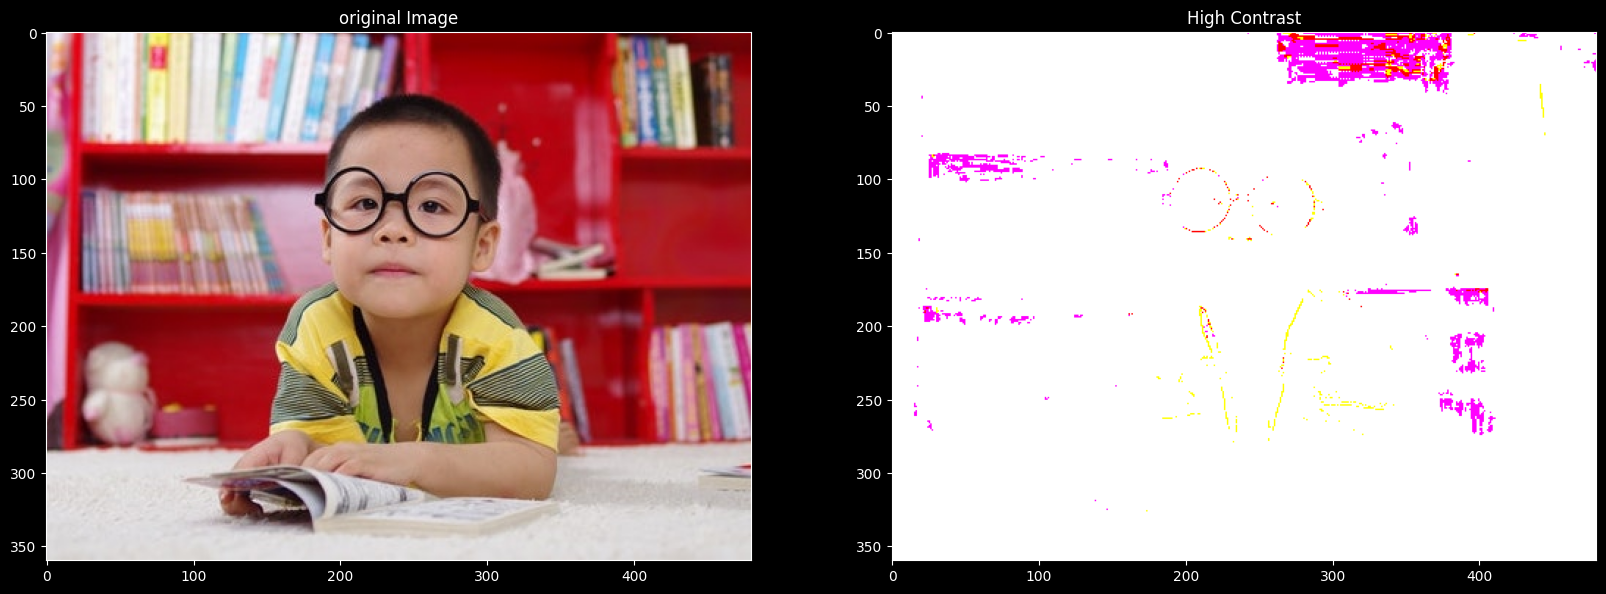

In [6]:
contrastPercentage = 40.
contrasHigh = image * (1 + contrastPercentage/100)

plt.figure(figsize=[20,20])
plt.subplot(121);plt.imshow(image[...,::-1]);plt.title("original Image");
plt.subplot(122);plt.imshow(contrasHigh[...,::-1]);plt.title("High Contrast");

In [7]:
print("Original Image Datatype : {}".format(image.dtype))
print("Contrast Image Datatype : {}".format(contrasHigh.dtype))

print("Original Image Highest Pixel Intensity : {}".format(image.max()))
print("Contrast Image Highest Pixel Intensity : {}".format(contrasHigh.max()))

Original Image Datatype : uint8
Contrast Image Datatype : float64
Original Image Highest Pixel Intensity : 255
Contrast Image Highest Pixel Intensity : 357.0


In [8]:
contrastPercentage = 40.
contrasHigh = image * (1 + contrastPercentage/100)
clippedContra = np.clip(contrasHigh, 0, 255)

contrastHighUint8 = np.uint8(clippedContra)
contrastNorm = (image + (1 + contrastPercentage/100))/255
contrastNormClip = np.clip(contrastNorm, 0, 1)

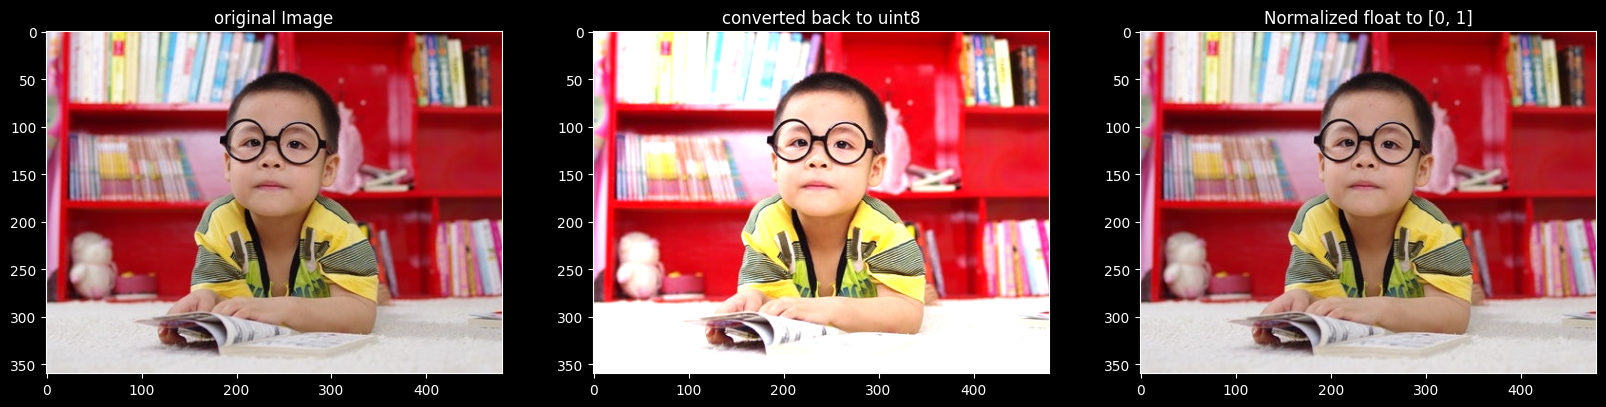

In [9]:
plt.figure(figsize=[20,20])
plt.subplot(131);plt.imshow(image[...,::-1]);plt.title("original Image");
plt.subplot(132);plt.imshow(contrastHighUint8[...,::-1]);plt.title("converted back to uint8");
plt.subplot(133);plt.imshow(contrastNormClip[...,::-1]);plt.title("Normalized float to [0, 1]");

## Brightness Enhacer

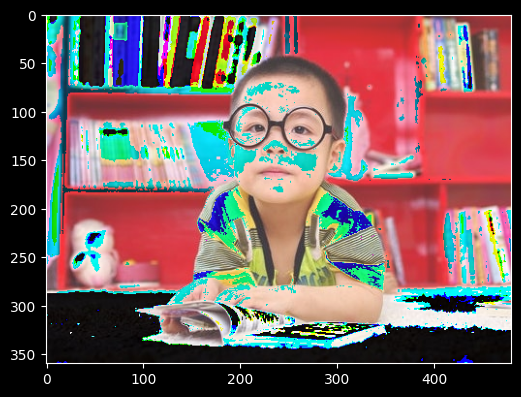

In [10]:
imagePath = f"{DATA_PATH}\\images\\boy.jpg"
image = cv2.imread(imagePath, 1)

brightOffset = 50
Hbright = image + brightOffset
plt.imshow(Hbright[:,:,::-1]);

In [11]:
print("Original Image Datatype : {}".format(image.dtype))
print("Brightness Image Datatype : {}\n".format(Hbright.dtype))

print("Original Image Highest Pixel Intensity : {}".format(image.max()))
print("Brightness Image Highest Pixel Intensity : {}".format(Hbright.max()))

Original Image Datatype : uint8
Brightness Image Datatype : uint8

Original Image Highest Pixel Intensity : 255
Brightness Image Highest Pixel Intensity : 255


In [12]:
a = np.array([[100, 110],
             [120, 130]],
             dtype="uint8")
a

array([[100, 110],
       [120, 130]], dtype=uint8)

In [13]:
a + 130

array([[230, 240],
       [250,   4]], dtype=uint8)

In [14]:
a - 130

array([[226, 236],
       [246,   0]], dtype=uint8)

In [15]:
cv2.add(a, 130)

array([[230, 240],
       [250, 255]], dtype=uint8)

In [16]:
a_int32 = np.int32(a)
b = a_int32 + 130
b

array([[230, 240],
       [250, 260]])

In [17]:
a_float32 = np.float32(a)/255
b = a_float32 + 130/255
b

array([[0.90196085, 0.94117653],
       [0.9803922 , 1.0196079 ]], dtype=float32)

In [18]:
c = b * 255
print("Output = \n{} \n".format(c))
print("Clipped output= \n{} \n".format(c.clip(0,255)))
b_uint8 = np.uint8(c.clip(0,255))
print("uint8 output = \n{} \n".format(b_uint8))

Output = 
[[230.00002 240.00002]
 [250.00002 260.     ]] 

Clipped output= 
[[230.00002 240.00002]
 [250.00002 255.     ]] 

uint8 output = 
[[230 240]
 [250 255]] 



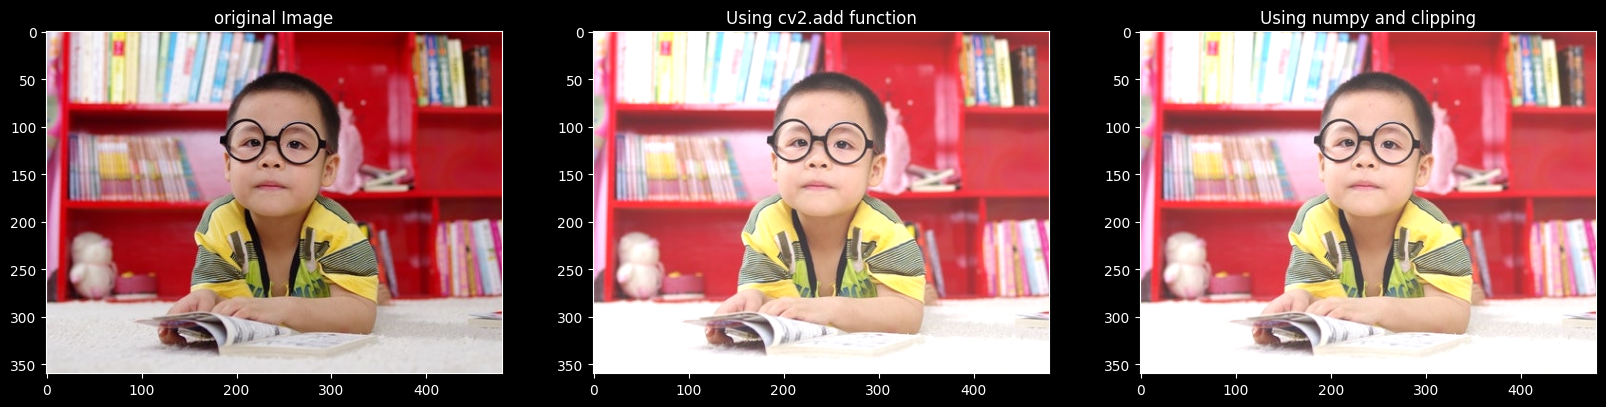

In [19]:
brightnessOffset = 50

# Add the offset for increasing brightness
brightHighOpenCV = cv2.add(image, np.ones(image.shape,dtype='uint8')*brightnessOffset)

brightHighInt32 = np.int32(image) + brightnessOffset
brightHighInt32Clipped = np.clip(brightHighInt32,0,255)

# Display the outputs
plt.figure(figsize=[20,20])
plt.subplot(131);plt.imshow(image[...,::-1]);plt.title("original Image");
plt.subplot(132);plt.imshow(brightHighOpenCV[...,::-1]);plt.title("Using cv2.add function");
plt.subplot(133);plt.imshow(brightHighInt32Clipped[...,::-1]);plt.title("Using numpy and clipping");

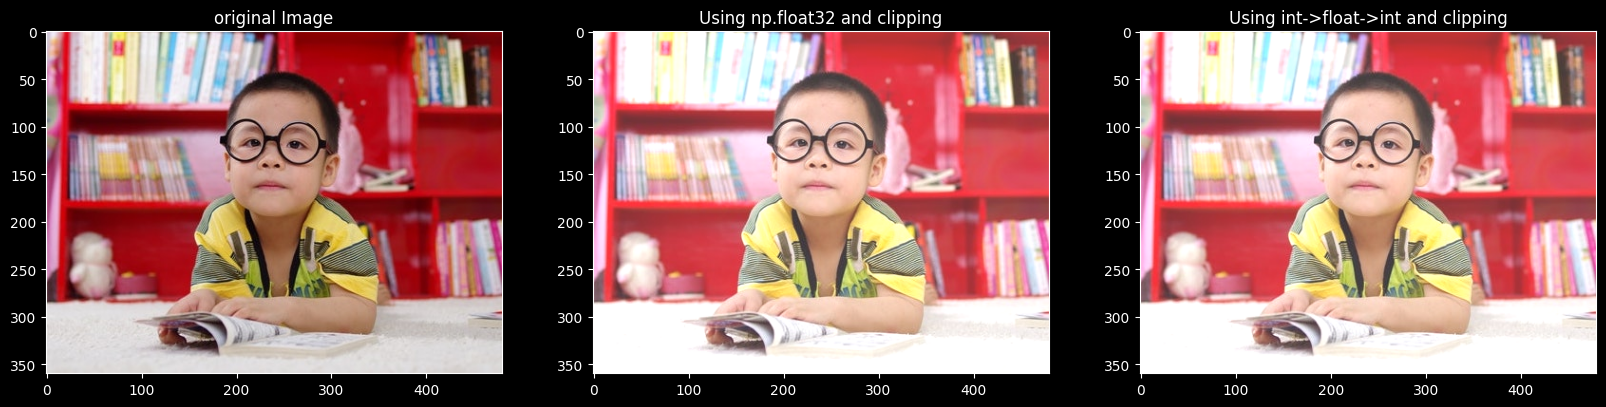

In [20]:
# Add the offset for increasing brightness
brightHighFloat32 = np.float32(image) + brightnessOffset
brightHighFloat32NormalizedClipped = np.clip(brightHighFloat32/255,0,1)

brightHighFloat32ClippedUint8 = np.uint8(brightHighFloat32NormalizedClipped*255)

# Display the outputs
plt.figure(figsize=[20,20])
plt.subplot(131);plt.imshow(image[...,::-1]);plt.title("original Image");
plt.subplot(132);plt.imshow(brightHighFloat32NormalizedClipped[...,::-1]);plt.title("Using np.float32 and clipping");
plt.subplot(133);plt.imshow(brightHighFloat32ClippedUint8[...,::-1]);plt.title("Using int->float->int and clipping");

https://docs.opencv.org/4.1.0/d3/dc1/tutorial_basic_linear_transform.html
https://www.youtube.com/watch?v=Qag_cTqZKBk
https://www.youtube.com/watch?v=_7iDTpTop04